# Plot movement throughout each session

In [147]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import src.paths

In [150]:
descs = {}
dates = [
    '2022-07-27',
    '2022-07-28',
    '2022-08-01',
    '2022-08-03',
    '2022-08-04',
    '2022-08-06',
    '2022-08-08',
    '2022-08-11',
    '2022-08-12',
    '2022-08-13',
    '2022-08-15',
    '2022-09-12',
    '2022-09-14',
    '2022-09-16',
]

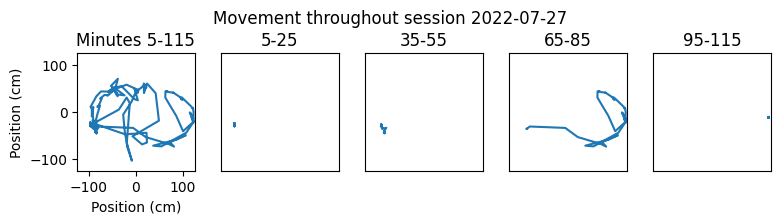

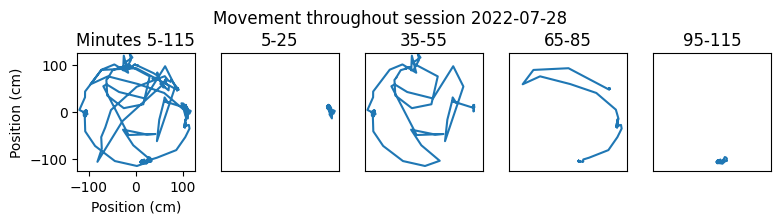

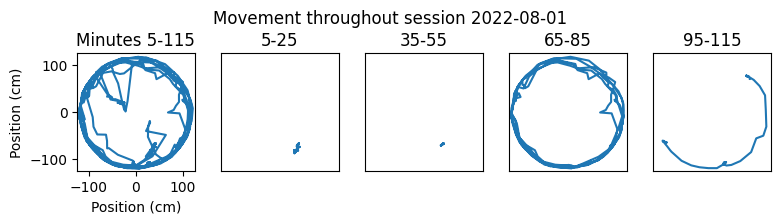

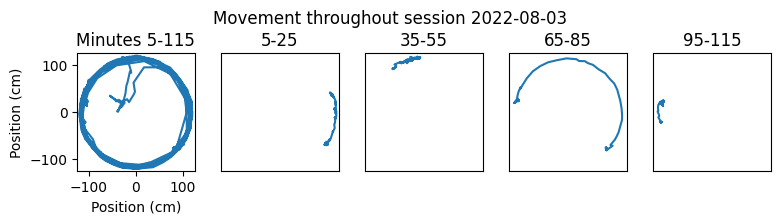

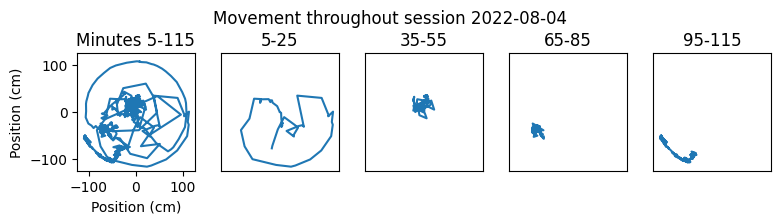

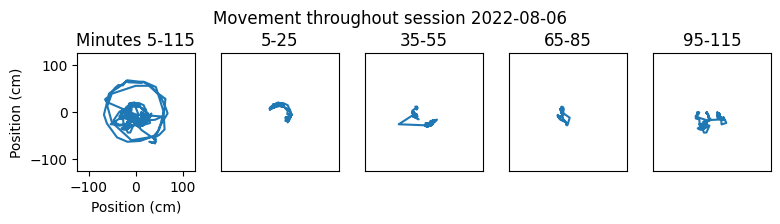

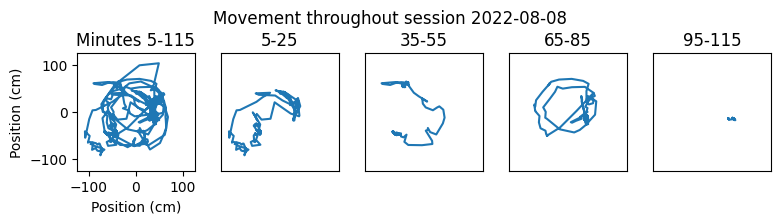

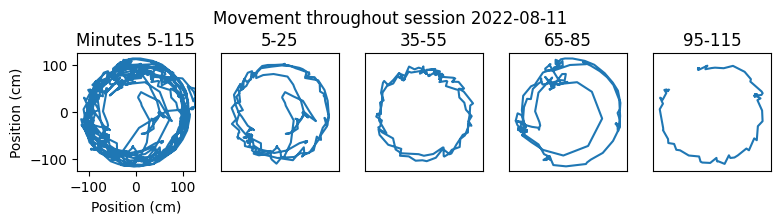

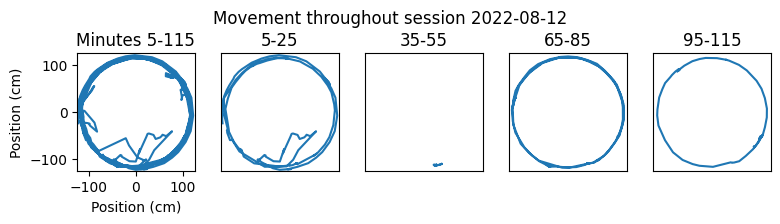

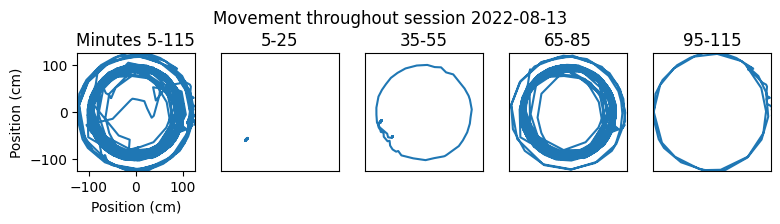

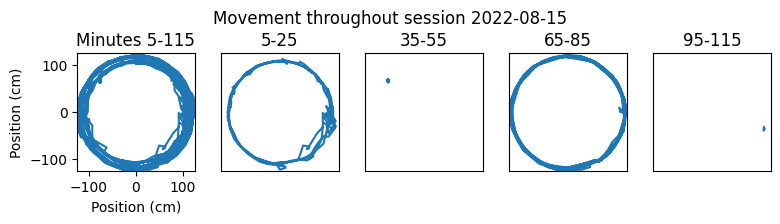

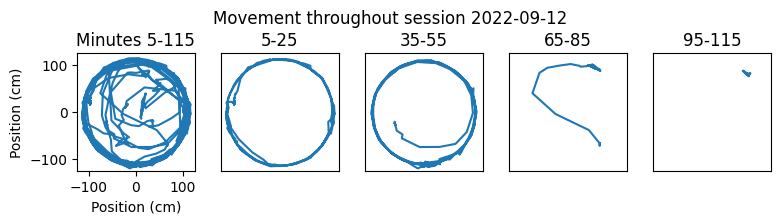

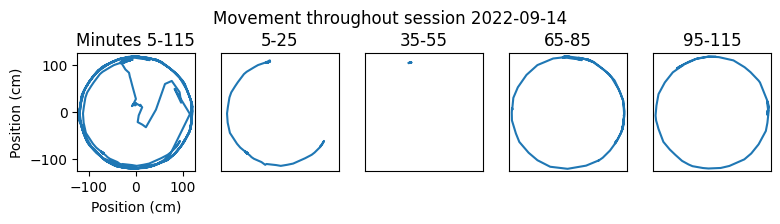

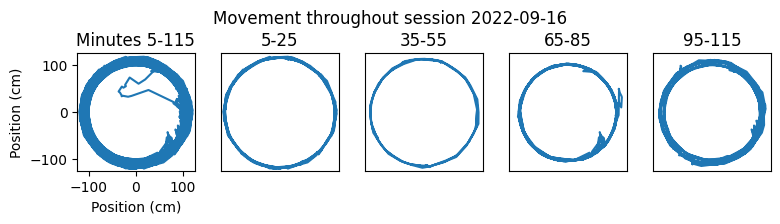

In [151]:
for date in dates:
    # resample
    X = pd.read_pickle(src.paths.DATA / date / f'{date}-behavior.pkl')
    t1 = pd.date_range(start=0, periods=len(X), freq='0.8ms')
    t2 = pd.date_range(start=0, periods=len(X) // 1250, freq='1s')
    X = X.set_index(t1)
    X = X.reindex(t2).interpolate(method='linear')
    X.index = pd.Series(np.arange(len(X)), name='time')

    # summarize
    descs[date] = X.describe()

    # plot
    fig, ax = plt.subplots(1, 5, figsize=(8, 2))
    plt.suptitle(f'Movement throughout session {date}')
    plt.sca(ax[0])
    plt.plot(X.loc[5 * 60:115 * 60, 'x'], X.loc[5 * 60:115 * 60, 'y'])
    plt.axis('square')
    plt.xlim([-125, 125])
    plt.ylim([-125, 125])
    plt.title(f'Minutes 5-115')
    plt.ylabel('Position (cm)')
    plt.xlabel('Position (cm)')
    for i in range(4):
        plt.sca(ax[i + 1])
        startmin = 5 + 30 * i
        endmin = 25 + 30 * i
        plt.plot(X.loc[startmin * 60:endmin * 60, 'x'], X.loc[startmin * 60:endmin * 60, 'y'])
        plt.axis('square')
        plt.xlim([-125, 125])
        plt.ylim([-125, 125])
        plt.title(f'{startmin}-{endmin}')
        plt.yticks([])
        plt.xticks([])
    plt.savefig(f'{date}-movement.png', dpi=300)
    plt.tight_layout()

In [152]:
for date in dates:
    print(date)
    display(descs[date])

2022-07-27


,x,y,yaw,speed
count,7202.000000,7202.000000,7202.000000,7202.000000
mean,4.673169,-20.903509,-111.235884,2.435300
std,102.342851,20.866570,49.008038,9.670579
min,-98.036645,-103.662404,-171.771864,0.034381
25%,-90.365565,-29.312485,-157.356533,0.724195
50%,-84.450625,-24.671231,-111.734662,1.190725
75%,120.016015,-11.454955,-57.199309,1.892618
max,123.334547,71.115304,170.290771,312.714866


2022-07-28


,x,y,yaw,speed
count,7423.000000,7423.000000,7423.000000,7423.000000
mean,36.605189,-23.293326,19.025082,4.353904
std,60.353158,73.661281,78.048400,16.070091
min,-120.536323,-119.615660,-178.928107,0.011739
25%,11.532220,-104.654607,-36.167275,0.818595
50%,22.844375,2.666363,30.925365,1.384030
75%,104.230606,13.352679,49.318694,2.317480
max,123.236162,124.194171,179.215549,437.949950


2022-08-01


,x,y,yaw,speed
count,7202.000000,7202.000000,7202.000000,7202.000000
mean,31.919783,-43.611068,-35.810438,4.170136
std,54.499022,62.714059,61.001428,11.720104
min,-121.125648,-120.014963,-179.714310,0.017252
25%,31.374648,-82.309746,-55.719403,0.813637
50%,37.680612,-68.320713,-41.731107,1.404037
75%,73.137271,-32.669790,-19.846029,2.495997
max,121.282794,117.895020,179.370502,191.883202


2022-08-03


,x,y,yaw,speed
count,7200.000000,7200.000000,7200.000000,7200.000000
mean,-18.438227,13.140003,-27.635875,5.243590
std,88.173062,67.290885,116.142906,16.545341
min,-120.970191,-121.282061,-179.290073,0.023933
25%,-106.906810,-59.047310,-160.807646,0.874817
50%,-28.914586,20.326516,-13.848388,1.508542
75%,82.130740,54.588691,117.510066,2.535921
max,120.488485,120.469872,179.123211,228.153280


2022-08-04


,x,y,yaw,speed
count,7203.000000,7203.000000,7203.000000,7203.000000
mean,-33.250925,-34.555497,44.608780,2.988912
std,36.118722,42.789570,58.645982,9.730413
min,-110.890906,-116.359173,-179.855045,0.017572
25%,-61.034574,-78.110220,28.212352,0.607655
50%,-38.719514,-32.900506,61.723149,1.023859
75%,2.760434,-15.501329,83.663432,1.776373
max,113.159536,108.173345,174.178001,248.432574


2022-08-06


,x,y,yaw,speed
count,7192.000000,7192.000000,7192.000000,7192.000000
mean,-5.692021,-7.695688,-29.207720,2.568970
std,17.374431,14.828932,110.836223,7.462202
min,-68.188155,-67.015227,-179.770876,0.016249
25%,-18.686356,-16.750616,-119.125161,0.599027
50%,-12.203133,-8.205003,-55.821366,0.999243
75%,12.406158,5.151844,54.616712,1.701076
max,67.546601,67.672864,179.967323,191.524114


2022-08-08


,x,y,yaw,speed
count,7203.000000,7203.000000,7203.000000,7203.000000
mean,-5.835609,-17.133810,-15.876591,2.907265
std,45.927876,38.152709,83.366251,9.736411
min,-108.666340,-92.107098,-179.625493,0.015234
25%,-49.088253,-47.950750,-53.171798,0.652482
50%,-4.417030,-14.229724,-51.521784,1.067915
75%,40.072364,-12.588905,52.936711,1.687989
max,68.272264,104.069928,179.773081,373.714766


2022-08-11


,x,y,yaw,speed
count,7208.000000,7208.000000,7208.000000,7208.000000
mean,-24.518197,14.991209,-7.821737,5.154099
std,56.978825,65.291788,121.238309,13.420715
min,-116.669771,-115.778699,-179.758422,0.002139
25%,-64.557090,-49.010985,-141.886660,0.845477
50%,-30.253144,34.467124,23.806312,1.432962
75%,11.934180,76.941128,109.063360,2.540279
max,130.905896,114.305185,179.549985,292.674191


2022-08-12


,x,y,yaw,speed
count,7204.000000,7204.000000,7204.000000,7204.000000
mean,4.708683,-27.677616,6.627327,3.702578
std,74.301646,84.722642,97.827083,11.059486
min,-126.720549,-123.036657,-177.968436,0.000000
25%,-70.105066,-112.581222,-68.164143,0.810877
50%,23.177535,-52.638636,-27.588120,1.385009
75%,56.384684,30.166072,93.747029,2.276992
max,122.098717,121.256817,178.659399,180.901020


2022-08-13


,x,y,yaw,speed
count,7204.000000,7204.000000,7204.000000,7204.000000
mean,-4.550327,-23.658397,-84.211085,16.537296
std,92.994717,43.116877,76.844605,33.348362
min,-125.072388,-130.434286,-179.923963,0.000000
25%,-74.064898,-55.536136,-117.611428,0.925354
50%,-68.103888,-21.905978,-111.475408,1.694940
75%,115.143369,-12.140229,-109.662777,4.126288
max,134.362467,126.886012,179.596624,198.623301


2022-08-15


,x,y,yaw,speed
count,7204.000000,7204.000000,7204.000000,7204.000000
mean,14.415334,16.347857,56.187386,7.597860
std,88.913107,63.796290,92.418214,20.769358
min,-126.930911,-127.572992,-179.998274,0.000000
25%,-76.458957,-36.315275,-18.330229,0.839659
50%,42.959190,39.522537,50.606494,1.469155
75%,110.283255,66.763997,161.253130,2.722745
max,124.947460,122.782328,179.449858,364.230799


2022-09-12


,x,y,yaw,speed
count,7202.000000,7202.000000,7202.000000,7202.000000
mean,16.361008,33.337225,24.658165,5.352220
std,70.720965,69.469301,94.123679,15.259914
min,-114.368266,-120.105641,-179.840174,0.010018
25%,-61.516820,-24.179655,-52.181104,0.827441
50%,54.465086,77.693099,55.566629,1.425743
75%,68.424915,88.991290,63.142414,2.504465
max,116.872573,114.928470,179.967404,245.311919


2022-09-14


,x,y,yaw,speed
count,7224.000000,7224.000000,7224.000000,7224.000000
mean,1.768206,40.255062,42.843071,3.378702
std,68.477997,81.300407,86.501462,9.914363
min,-120.769701,-120.928118,-179.563445,0.000000
25%,-43.470537,-33.408087,-23.250447,0.881940
50%,-27.485979,99.561854,84.918729,1.524871
75%,65.520454,105.357496,112.723446,2.526347
max,120.493397,118.436098,179.667753,287.195138


2022-09-16


,x,y,yaw,speed
count,7201.000000,7201.000000,7201.000000,7201.000000
mean,1.454681,-18.845278,-15.426604,15.917466
std,70.784088,82.780715,98.570280,27.694096
min,-120.954110,-121.166907,-179.832715,0.019104
25%,-70.222801,-100.154867,-92.251363,1.063706
50%,16.250927,-35.304886,-35.755730,2.061667
75%,49.646487,60.733361,75.954678,15.018785
max,121.319823,118.783505,179.622760,386.824575
